# 10 minutes to Pingouin

## 1. T-test

In [1]:
import numpy as np
import pandas as pd
import pingouin as pg

np.random.seed(123)
mean, cov, n = [4, 5], [(1, .6), (.6, 1)], 30
x, y = np.random.multivariate_normal(mean, cov, n).T

# T-test
pg.ttest(x, y)

,T,dof,tail,p-val,CI95%,cohen-d,BF10,power
T-test,-3.400706,58,two-sided,0.001222,"[-1.68, -0.43]",0.878059,26.155,0.916807


## 2. Pearson's correlation

In [2]:
pg.corr(x, y)

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,30,0.594785,"[0.3, 0.79]",0.353769,0.3059,0.000527,69.723,0.950373


## 3. Robust correlation

In [3]:
# Introduce an outlier
x[5] = 18
# Use the robust Shepherd's pi correlation
pg.corr(x, y, method="shepherd")

,n,outliers,r,CI95%,r2,adj_r2,p-val,power
shepherd,30,1,0.561084,"[0.25, 0.77]",0.314815,0.264061,0.001543,0.916576


## 4. Test the normality of the data

In [4]:
display(pg.normality(x))                                    # Univariate normality
pg.multivariate_normality(np.column_stack((x, y)))          # Multivariate normality

,W,pval,normal
0,0.615321,1.128503e-07,False


(False, 0.00018201726664169923)

## 5. One-way ANOVA using a pandas DataFrame

In [5]:
# Read an example dataset
df = pg.read_dataset('mixed_anova')

# Run the ANOVA
aov = pg.anova(data=df, dv='Scores', between='Group', detailed=True)
aov

,Source,SS,DF,MS,F,p-unc,np2
0,Group,5.459963,1,5.459963,5.243656,0.0232,0.028616
1,Within,185.342729,178,1.041251,NaN,NaN,NaN


## 6. Repeated measures ANOVA

In [6]:
pg.rm_anova(data=df, dv='Scores', within='Time', subject='Subject', detailed=True)

,Source,SS,DF,MS,F,p-unc,np2,eps
0,Time,7.628428,2,3.814214,3.912796,0.022629,0.062194,0.998751
1,Error,115.027023,118,0.974805,NaN,NaN,NaN,NaN


## 7. Post-hoc tests corrected for multiple-comparisons

In [7]:
# FDR-corrected post hocs with Hedges'g effect size
posthoc = pg.pairwise_ttests(data=df, dv='Scores', within='Time', subject='Subject', 
                             parametric=True, padjust='fdr_bh', effsize='hedges')

# Pretty printing of table
pg.print_table(posthoc, floatfmt='.3f', tablefmt="pretty")


POST HOC TESTS

+----------+---------+---------+--------+------------+---------------------+------+-----------+----------------------+----------------------+----------+-------+----------------------+
| Contrast |    A    |    B    | Paired | Parametric |          T          | dof  |   Tail    |        p-unc         |        p-corr        | p-adjust | BF10  |        hedges        |
+----------+---------+---------+--------+------------+---------------------+------+-----------+----------------------+----------------------+----------+-------+----------------------+
|   Time   | August  | January |  True  |    True    | -1.740369587513839  | 59.0 | two-sided | 0.08700774271650816  | 0.13051161407476225  |  fdr_bh  | 0.582 | -0.32758280980922655 |
|   Time   | August  |  June   |  True  |    True    | -2.7432379825451427 | 59.0 | two-sided | 0.008044546747231625 | 0.024133640241694877 |  fdr_bh  | 4.232 | -0.4825470383576598  |
|   Time   | January |  June   |  True  |    True    | -1.02361

**Non-parametric version (= pairwise wilcoxon tests)**

In [8]:
# FDR-corrected post hocs with Hedges'g effect size
pg.pairwise_ttests(data=df, dv='Scores', within='Time', subject='Subject', 
                   parametric=False, padjust='fdr_bh', effsize='hedges').round(3)

,Contrast,A,B,Paired,Parametric,W-val,Tail,p-unc,p-corr,p-adjust,hedges
0,Time,August,January,True,False,716.0,two-sided,0.144,0.216,fdr_bh,-0.328
1,Time,August,June,True,False,564.0,two-sided,0.010,0.030,fdr_bh,-0.483
2,Time,January,June,True,False,887.0,two-sided,0.840,0.840,fdr_bh,-0.170


## 8. Two-way mixed ANOVA

In [9]:
aov = pg.mixed_anova(data=df, dv='Scores', between='Group', within='Time',
                       subject='Subject', correction=False)
aov.round(3)

,Source,SS,DF1,DF2,MS,F,p-unc,np2,eps
0,Group,5.460,1,58,5.460,5.052,0.028,0.080,NaN
1,Time,7.628,2,116,3.814,4.027,0.020,0.065,0.999
2,Interaction,5.167,2,116,2.584,2.728,0.070,0.045,NaN


## 9. Pairwise correlations between columns of a dataframe

See [04_Correlations.ipynb](04_Correlations.ipynb) for more examples.

In [10]:
np.random.seed(123)
z = np.random.normal(5, 1, 30)
data = pd.DataFrame({'X': x, 'Y': y, 'Z': z})

# Pairwise correlations
pg.pairwise_corr(data, columns=['X', 'Y', 'Z'], method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,X,Y,pearson,two-sided,30,0.366,"[0.01, 0.64]",0.134,0.070,0.384,0.047,1.5,0.525
1,X,Z,pearson,two-sided,30,0.251,"[-0.12, 0.56]",0.063,-0.006,0.257,0.181,0.534,0.272
2,Y,Z,pearson,two-sided,30,0.020,"[-0.34, 0.38]",0.000,-0.074,0.020,0.916,0.228,0.051


**Alternative, as a correlation matrix with p-values**

In [11]:
data[['X', 'Y', 'Z']].rcorr(method='spearman')

,X,Y,Z
X,-,***,
Y,0.573,-,
Z,0.168,0.021,-


## 10. Convert between effect sizes

In [12]:
# Convert from Cohen's d to Hedges' g
pg.convert_effsize(0.4, 'cohen', 'hedges', nx=10, ny=12)

0.38481012658227853

## 11. Multiple linear regression

In [13]:
pg.linear_regression(data[['X', 'Z']], data['Y']).round(4)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,4.6503,0.8409,5.5299,0.0000,0.1394,0.0757,2.9249,6.3758
1,X,0.1429,0.0684,2.0887,0.0463,0.1394,0.0757,0.0025,0.2832
2,Z,-0.0694,0.1670,-0.4157,0.6809,0.1394,0.0757,-0.4120,0.2732


## 12. Mediation analysis

In [14]:
pg.mediation_analysis(data=data, x='X', m='Z', y='Y', seed=42, n_boot=1000).round(4)

,path,coef,se,pval,CI[2.5%],CI[97.5%],sig
0,Z ~ X,0.1029,0.0749,0.1805,-0.0506,0.2564,No
1,Y ~ Z,0.0182,0.1710,0.9160,-0.3322,0.3686,No
2,Total,0.1357,0.0652,0.0467,0.0021,0.2693,Yes
3,Direct,0.1429,0.0684,0.0463,0.0025,0.2832,Yes
4,Indirect,-0.0071,0.0254,0.8980,-0.0695,0.0290,No


## 13. Plot achieved power of a paired T-test

Plot the curve of achieved power given the effect size (Cohen d) and the sample size of a paired T-test.

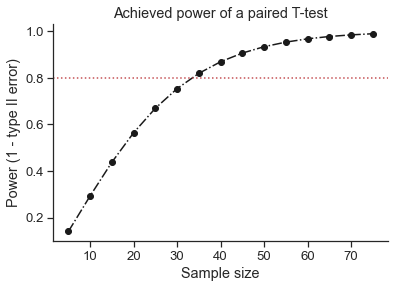

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', context='notebook', font_scale=1.2)

d = 0.5  # Fixed effect size
n = np.arange(5, 80, 5)  # Incrementing sample size

# Compute the achieved power
pwr = pg.power_ttest(d=d, n=n, contrast='paired', tail='two-sided')

# Start the plot
plt.plot(n, pwr, 'ko-.')
plt.axhline(0.8, color='r', ls=':')
plt.xlabel('Sample size')
plt.ylabel('Power (1 - type II error)')
plt.title('Achieved power of a paired T-test')
sns.despine()

## 14. Paired plot

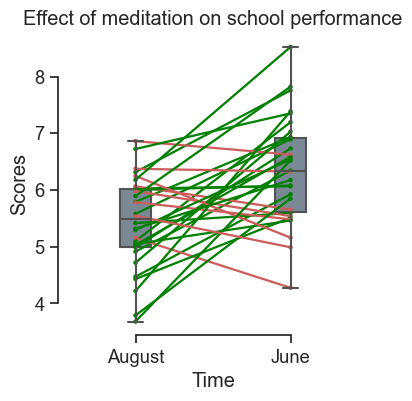

In [16]:
df = pg.read_dataset('mixed_anova').query("Group == 'Meditation' and Time != 'January'")
ax = pg.plot_paired(data=df, dv='Scores', within='Time', subject='Subject')
_ = ax.set_title("Effect of meditation on school performance")

## 15. Chi-squared test of independence

In [17]:
data = pg.read_dataset('chi2_independence')
expected, observed, stats = pg.chi2_independence(data, x='sex', y='target')
stats.round(3)

,test,lambda,chi2,dof,p,cramer,power
0,pearson,1.000,22.717,1.0,0.0,0.274,0.997
1,cressie-read,0.667,22.931,1.0,0.0,0.275,0.998
2,log-likelihood,0.000,23.557,1.0,0.0,0.279,0.998
3,freeman-tukey,-0.500,24.220,1.0,0.0,0.283,0.998
4,mod-log-likelihood,-1.000,25.071,1.0,0.0,0.288,0.999
5,neyman,-2.000,27.458,1.0,0.0,0.301,0.999
